## **Project 4. Student Performance**
> **(Team 9) Rachel Schoen, Andrea Wu, Mahind Rao, Mahalel Peter**

### I. **Introduction**
* *   * * 

For this project, we sought to explore a means to analyze and predict student performance based off a multitude of different variables, including but not limited to: attendance, taking notes, reading frequency, transporation, scholarships, and even parental status.

In other words:

> **What are the key factors that influence the success of a student?**


- How do students with additional work responsibilities fare academically compared to those without?
- How does the type of accommodation affect students' study habits and performance?
- How does discussion and group work influence students' interest and success in their courses?
- Can we predict a student’s academic performance (e.g., grade point average or success in courses) based on their personal background, study habits, and extracurricular activities?

* *   * * 
We decided to approach the topic in the following outline:

#### A. **Exploratory Data Analysis**
  - Create basic visualizations to observe any trends or patterns using Matplotlib or Tableau.
  - Create some sort of interactivity with the graphs, using HTML or otherwise.

#### B. **SQL Database**
  - Populate a SQL database using the CSV file, then connect to the database in order to continue analysis and predictions.

#### C. **Data Modeling**
  - Create a relational data model, or a graph data model.
  - Use supervised learning.
  - Create a Logistic Regression model.

#### D. **Model Optimization and Evaluation**
  - Try using a different number of layers, activations, optimizers, and epochs to maximize the accuracy of our model.
  - Try splitting the data to optimize the model.
  - Try using the Adam algorithm with our model for further optimization.
  - Evaluate the model's performance by creating a confusion matrix and/or a classification report.

  

### II. **Exploratory Data Analysis**
* *   * * 

To start with, we decided to manually clean the data via Excel, removing any columns that we deemed unnecessary or difficult to draw strong conclusions from. 

From there, we performed an exploratory data analysis— some basic observations by reading the CSV file directly in order to visualize the story a little more.

In [22]:
import pandas as pd
performance = pd.read_csv('Resources\StudentsPerformance_with_headers.csv', encoding='ISO-8859-1', low_memory=False)
performance.head()

,StudentID,StudentAge,Sex,GraduatedHighSchoolType,ScholarshipType,AdditionalWork,ArtisticOrSportsActivity,HasPartner,TotalSalary,Transportation,...,ReadingScientific,SeminarAttendance,ProjectImpact,ClassAttendance,MidtermPrepAloneOrGroup,MidtermPrepTimeSpent,NoteTaking,ListeningInClass,DiscussionInterest,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,2,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,1,1,1,2,1,2,2,2,1


### III. **Database Design & Implementation**
* *   * * 

The following is the ERDV diagram of our database.

![ERDV](https://i.imgur.com/jvNpA4e.png)

There are 4 tables in total for this database:



1. **Students**
2. **StudentActivities**
3. **AcademicPerformance**
4. **FamilyBackground**


Each table holds information pertinent to the overarching question of student performance.

The following is the breakdown for each table, including some reasons for choosing to keep the information we did.


> **`Students`**

- textextextext
- textextextext
- textextextext

> **`StudentActivities`**

- textextextext
- textextextext
- textextextext

> **`AcademicPerformance`**

- textextextext
- textextextext
- textextextext

> **`FamilyBackground`**

- textextextext
- textextextext
- textextextext

With the database built and stored in a .sqlite file, we can now connect to it via sqlalchemy in order to further perform analysis.

In [23]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

In [24]:
# First create an engine to project4.sqlite.
engine = create_engine("sqlite:///Resources/Project4.sqlite")

# Reflect an existing database into a new model using automap_base.
Base = automap_base()
# Reflect the tables.
Base.prepare(engine)

# Viewing all of the classes that automap found.
Base.classes.keys()

['studentactivities', 'familybackground', 'academicperformance', 'students']

In [25]:
studentactivities_base = Base.classes.studentactivities
familybackground_base = Base.classes.familybackground
academicperformance_base = Base.classes.academicperformance
students_base = Base.classes.students

In [26]:
# Create our session (the link) from Python to the database.
session = Session(engine)

In [27]:
# Linking each dataset to a dataframe via the session query

students_dataset = session.query(students_base.studentid, students_base.studentage, students_base.sex, students_base.graduatedhighschooltype, students_base.scholarshiptype)
studentactivities_dataset = session.query(studentactivities_base.activityid, studentactivities_base.studentid, studentactivities_base.additionalwork, studentactivities_base.artisticorsportsactivity, studentactivities_base.haspartner, studentactivities_base.transportation, studentactivities_base.weeklystudyhours)
familybackground_dataset = session.query(familybackground_base.backgroundid, familybackground_base.studentid, familybackground_base.motherseducation, familybackground_base.fatherseducation, familybackground_base.numberofsiblings, familybackground_base.parentalstatus, familybackground_base.totalsalary)
academicperformance_dataset = session.query(academicperformance_base.performanceid, academicperformance_base.studentid, academicperformance_base.seminarattendance, academicperformance_base.projectimpact, academicperformance_base.classattendance, academicperformance_base.midtermprepaloneorgroup, academicperformance_base.midtermpreptimespent, academicperformance_base.notetaking, academicperformance_base.listeninginclass, academicperformance_base.discussioninterest, academicperformance_base.grade)

In [28]:
students_df = pd.DataFrame(students_dataset)
students_df

,studentid,studentage,sex,graduatedhighschooltype,scholarshiptype
0,STUDENT1,2,2,3,3
1,STUDENT2,2,2,3,3
2,STUDENT3,2,2,2,3
3,STUDENT4,1,1,1,3
4,STUDENT5,2,2,1,3
...,...,...,...,...,...
140,STUDENT141,2,1,2,3
141,STUDENT142,1,1,2,4
142,STUDENT143,1,1,1,4
143,STUDENT144,2,1,2,4


In [29]:
studentactivities_df = pd.DataFrame(studentactivities_dataset)
studentactivities_df

,activityid,studentid,additionalwork,artisticorsportsactivity,haspartner,transportation,weeklystudyhours
0,1,STUDENT1,1,2,2,1,3
1,2,STUDENT2,1,2,2,1,2
2,3,STUDENT3,2,2,2,4,2
3,4,STUDENT4,1,2,1,1,3
4,5,STUDENT5,2,2,1,1,2
...,...,...,...,...,...,...,...
140,141,STUDENT141,1,1,2,1,3
141,142,STUDENT142,2,2,2,4,3
142,143,STUDENT143,2,2,2,1,2
143,144,STUDENT144,1,1,1,2,2


In [30]:
familybackground_df = pd.DataFrame(familybackground_dataset)
familybackground_df

,backgroundid,studentid,motherseducation,fatherseducation,numberofsiblings,parentalstatus,totalsalary
0,1,STUDENT1,1,2,3,1,1
1,2,STUDENT2,2,3,2,1,1
2,3,STUDENT3,2,2,2,1,2
3,4,STUDENT4,1,2,5,1,2
4,5,STUDENT5,3,3,2,1,3
...,...,...,...,...,...,...,...
140,141,STUDENT141,1,2,2,2,1
141,142,STUDENT142,1,1,5,1,1
142,143,STUDENT143,3,4,4,1,1
143,144,STUDENT144,4,4,1,1,5


In [31]:
academicperformance_df = pd.DataFrame(academicperformance_dataset)
academicperformance_df

,performanceid,studentid,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
0,1,STUDENT1,1,1,1,1,1,3,2,1,1
1,2,STUDENT2,1,1,1,1,1,3,2,3,1
2,3,STUDENT3,1,1,1,1,1,2,2,1,1
3,4,STUDENT4,1,1,1,1,2,3,2,2,1
4,5,STUDENT5,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,STUDENT141,1,1,1,1,1,2,1,2,5
141,142,STUDENT142,2,1,2,1,1,3,2,2,5
142,143,STUDENT143,1,1,1,1,1,3,3,2,1
143,144,STUDENT144,1,1,1,2,1,2,1,2,4


In [40]:
dfs = [students_df, studentactivities_df, familybackground_df, academicperformance_df]
dfs = [df.set_index('studentid') for df in dfs]
student_performance = dfs[0].join(dfs[1:])

In [41]:
student_performance

,studentage,sex,graduatedhighschooltype,scholarshiptype,activityid,additionalwork,artisticorsportsactivity,haspartner,transportation,weeklystudyhours,...,performanceid,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
studentid,,,,,,,,,,,,,,,,,,,,,
STUDENT1,2,2,3,3,1,1,2,2,1,3,...,1,1,1,1,1,1,3,2,1,1
STUDENT2,2,2,3,3,2,1,2,2,1,2,...,2,1,1,1,1,1,3,2,3,1
STUDENT3,2,2,2,3,3,2,2,2,4,2,...,3,1,1,1,1,1,2,2,1,1
STUDENT4,1,1,1,3,4,1,2,1,1,3,...,4,1,1,1,1,2,3,2,2,1
STUDENT5,2,2,1,3,5,2,2,1,1,2,...,5,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STUDENT141,2,1,2,3,141,1,1,2,1,3,...,141,1,1,1,1,1,2,1,2,5
STUDENT142,1,1,2,4,142,2,2,2,4,3,...,142,2,1,2,1,1,3,2,2,5
STUDENT143,1,1,1,4,143,2,2,2,1,2,...,143,1,1,1,1,1,3,3,2,1


In [42]:
student_performance.reset_index(inplace=True)
student_performance

,studentid,studentage,sex,graduatedhighschooltype,scholarshiptype,activityid,additionalwork,artisticorsportsactivity,haspartner,transportation,...,performanceid,seminarattendance,projectimpact,classattendance,midtermprepaloneorgroup,midtermpreptimespent,notetaking,listeninginclass,discussioninterest,grade
0,STUDENT1,2,2,3,3,1,1,2,2,1,...,1,1,1,1,1,1,3,2,1,1
1,STUDENT2,2,2,3,3,2,1,2,2,1,...,2,1,1,1,1,1,3,2,3,1
2,STUDENT3,2,2,2,3,3,2,2,2,4,...,3,1,1,1,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,4,1,2,1,1,...,4,1,1,1,1,2,3,2,2,1
4,STUDENT5,2,2,1,3,5,2,2,1,1,...,5,1,1,1,2,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,141,1,1,2,1,...,141,1,1,1,1,1,2,1,2,5
141,STUDENT142,1,1,2,4,142,2,2,2,4,...,142,2,1,2,1,1,3,2,2,5
142,STUDENT143,1,1,1,4,143,2,2,2,1,...,143,1,1,1,1,1,3,3,2,1
143,STUDENT144,2,1,2,4,144,1,1,1,2,...,144,1,1,1,2,1,2,1,2,4


### IV. **Data Modeling**
* *   * * 

##### **1. Data Preparation**


Before we could load the data into tables, we first had to clean the datasets given to us. This was done already in the Exploratory Data Analysis step, but from there, we further eliminated any non-necessary elements in order to perform machine learning, most notably the dataset ids (performanceid, activityid, backgroundid) that were merged.
* *   * * 

To start with, we wanted to look at the correlation matrix between grades and the other variables.

In [53]:
import numpy as np

data_cm = student_performance.copy()
data_cm = data_cm.drop(['studentid'], axis=1)
corr_fs = data_cm.corr()
corr_fs_grade = corr_fs['grade']

value_corr = 1.5*corr_fs_grade.mean()
value_corr

0.1030778277416655

It's a very low correlation, but perhaps we can find something else if we keep going.

In [54]:
data_corr = student_performance.copy()
data_corr = data_corr.drop('studentid', axis= 1)

corr_ = data_corr.corr()['grade']
columns_corr = [corr_fs_grade.index[i] for i, value in enumerate(corr_) if value > value_corr or value < - value_corr]
columns_corr

['sex',
 'graduatedhighschooltype',
 'activityid',
 'additionalwork',
 'transportation',
 'backgroundid',
 'totalsalary',
 'performanceid',
 'seminarattendance',
 'projectimpact',
 'classattendance',
 'discussioninterest',
 'grade']

We'll start by splitting the data via train_test_split.

In doing so, you split the dataset (X,y) into a training set (80%), and a test set (20%).
It's a quick and efficient way of preparing data for machine learning models.


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data_fs = student_performance.copy()
data_fs = data_fs.iloc[:,1:]

# we don't need the table ids for this, so we'll remove activityid, backgroundid, and performanceid.

data_fs = data_fs.drop('activityid', axis=1)
data_fs = data_fs.drop('backgroundid', axis=1)
data_fs = data_fs.drop('performanceid', axis=1)

def change_grades_num(grade):
    if grade in [0,1,2,3]:
        # 'DD','DC','CC','CB'
        return 0.0
    elif grade in [4,5,6,7]:
        # 'BB','BA','AA'
        return 1.0

data_fs['grade'] = data_fs['grade'].apply(lambda x: change_grades_num(x))

X_fs = data_fs.drop('grade', axis=1)
y_fs = data_fs['grade']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.33, random_state=42)

From here, we can begin to try different ways of feature selection.

Below, we're trying a filter-based approach of supervised learning, the mutual_info_classif function.

One positive of using this method is that it's faster than using a wrapper method, and more generalized. It's also easier to interpret: a feature is discarded if it has no statistical relationship to the target. However, filter methods have a major drawback— they look at each feature in isolation, evaluating its relation to the target. This makes them prone to discarding useful features that are weak predictors of the target on their own, but add value to the model when combined with others.

But, since we're doing this project for the sake of education, let's try it anyway.

In [83]:

from sklearn.feature_selection import mutual_info_classif
importances_MIF = mutual_info_classif(X_train_fs,y_train_fs)
df_MIF = pd.DataFrame({"Features": data_fs.columns[:-1],'Importance':importances_MIF})
df_MIF = df_MIF.sort_values('Importance', ascending=False, ignore_index=True)
df_MIF_filter = df_MIF[(df_MIF.Importance > 0)]
features_MIF = list(df_MIF_filter.Features)
features_MIF.append('grade')
features_MIF

['classattendance',
 'listeninginclass',
 'seminarattendance',
 'notetaking',
 'totalsalary',
 'weeklystudyhours',
 'scholarshiptype',
 'additionalwork',
 'discussioninterest',
 'artisticorsportsactivity',
 'numberofsiblings',
 'graduatedhighschooltype',
 'projectimpact',
 'midtermpreptimespent',
 'grade']

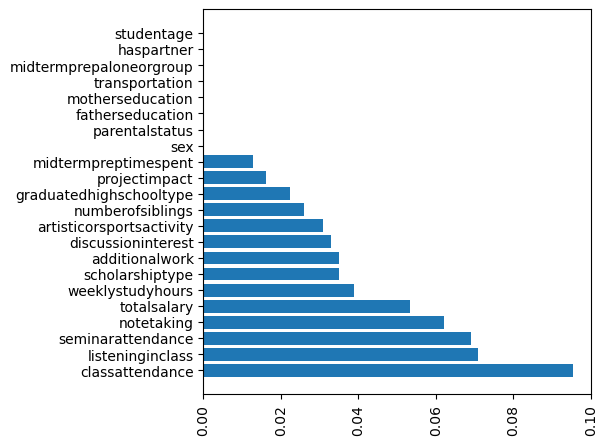

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.barh(df_MIF.Features, df_MIF.Importance)
#plt.title()
plt.xticks(rotation=90)
plt.show()

So, according to the mutual_info_classif result, it seems class attendance is the most important feature, followed by listening in class, then seminar attendance.

##### **2.Training the model**


##### **3. Logistic Regression**

  - Create a Logistic Regression model.

In [87]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=10, n_jobs=-1, max_iter=500)
fss = SequentialFeatureSelector(lr, k_features='best', forward=True, n_jobs=-1)
fss.fit(X_train_fs, y_train_fs)
features_FSS = list(fss.k_feature_names_)
features_FSS.append('grade')
features_FSS

['studentage',
 'sex',
 'graduatedhighschooltype',
 'scholarshiptype',
 'artisticorsportsactivity',
 'weeklystudyhours',
 'numberofsiblings',
 'parentalstatus',
 'totalsalary',
 'projectimpact',
 'midtermprepaloneorgroup',
 'midtermpreptimespent',
 'grade']

##### **4. Model Optimization and Evaluation**
  - Try using a different number of layers, activations, optimizers, and epochs to maximize the accuracy of our model.
  - Try splitting the data to optimize the model.
  - Try using the Adam algorithm with our model for further optimization.
  - Evaluate the model's performance by creating a confusion matrix and/or a classification report.

In [ ]:
# code here

### V. **Final Analysis & Further Considerations**
* *   * * 